<a href="https://colab.research.google.com/github/afifahsalsa/PCVK_Genap_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

<BarContainer object of 256 artists>

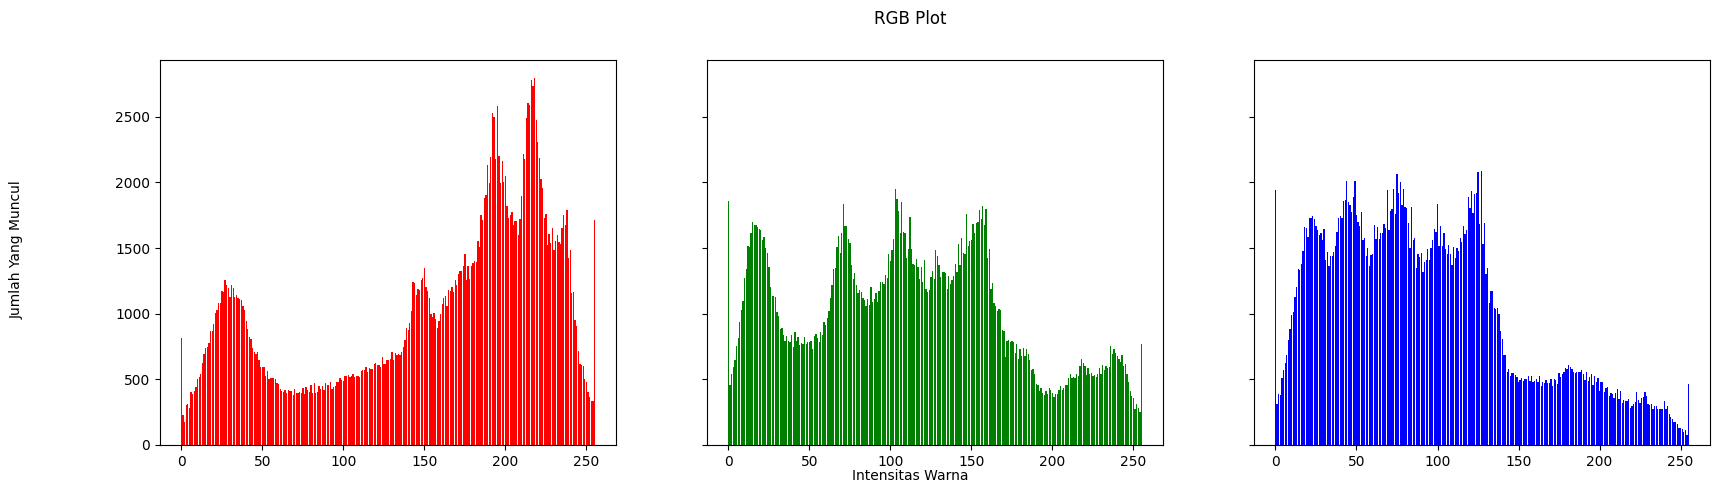

In [33]:
img = cv.imread('/content/drive/MyDrive/lena (1).jpg')
height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0, width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('RGB Plot')
fig.text(0.05, 0.5, 'Jumlah Yang Muncul', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

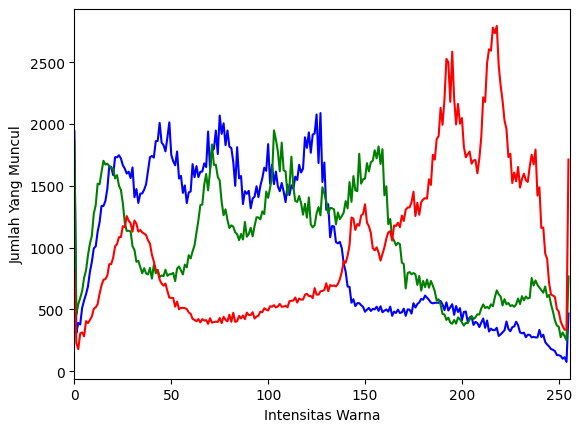

In [34]:
colors = ("blue", "green", "red")
channel_ids = (0,1,2)

plt.xlim([0,256])
for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      img[:,:, channel_id], bins=256, range=(0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Yang Muncul")

plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

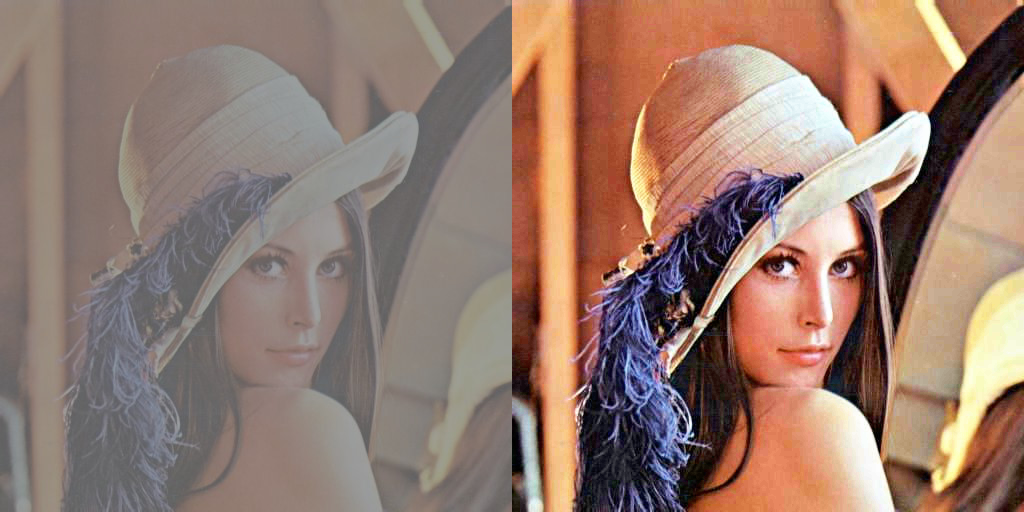

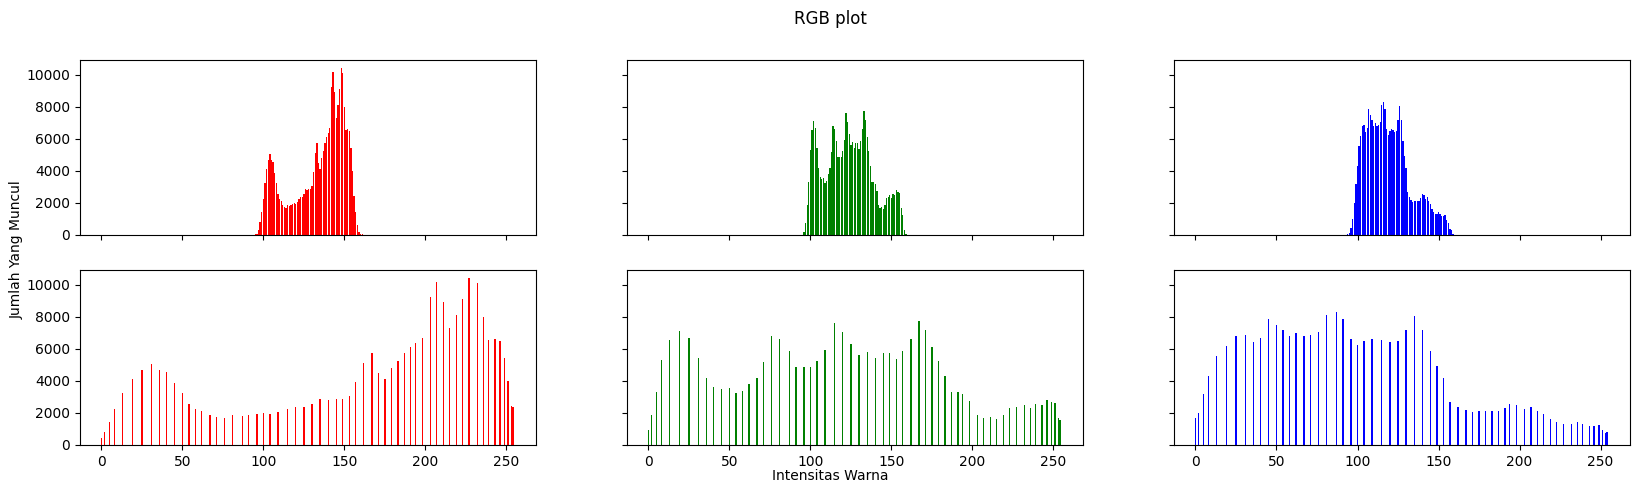

In [35]:
img1 = cv.imread('/content/drive/MyDrive/lena_lc.jpg')
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

real_hist = histog(img1)
#comvert ke numpy array
img_array = np.asarray(img1)

#step 1
histogram_array = np.bincount(img_array.flatten(), minlength=256)

num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels
chistogram_array = np.cumsum(histogram_array)

#Step 2
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

#Step 3
img_list = list(img_array.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2))
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Yang Muncul', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, real_hist[2], color='red')
  axs[0,1].bar(names, real_hist[1], color='green')
  axs[0,2].bar(names, real_hist[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig. suptitle('RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Yang Muncul', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, real_hist[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

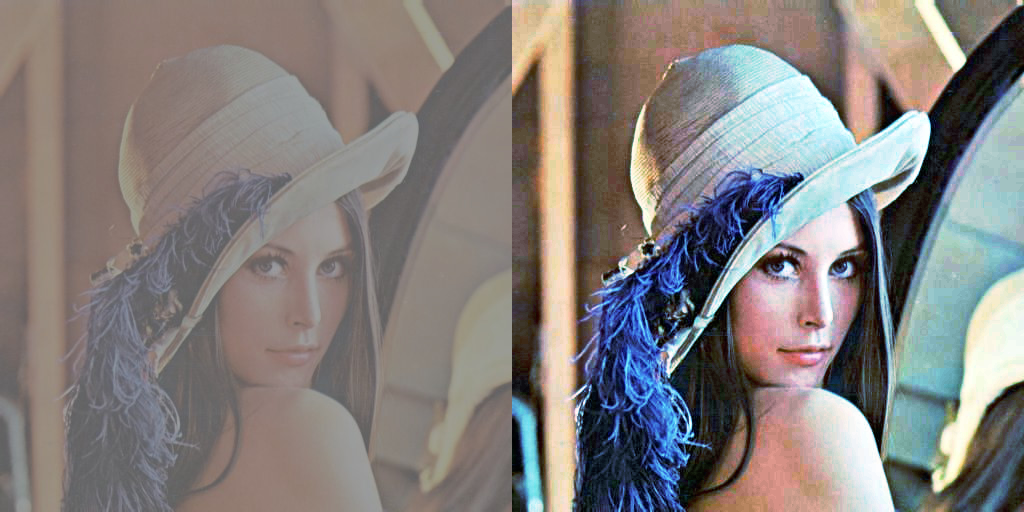

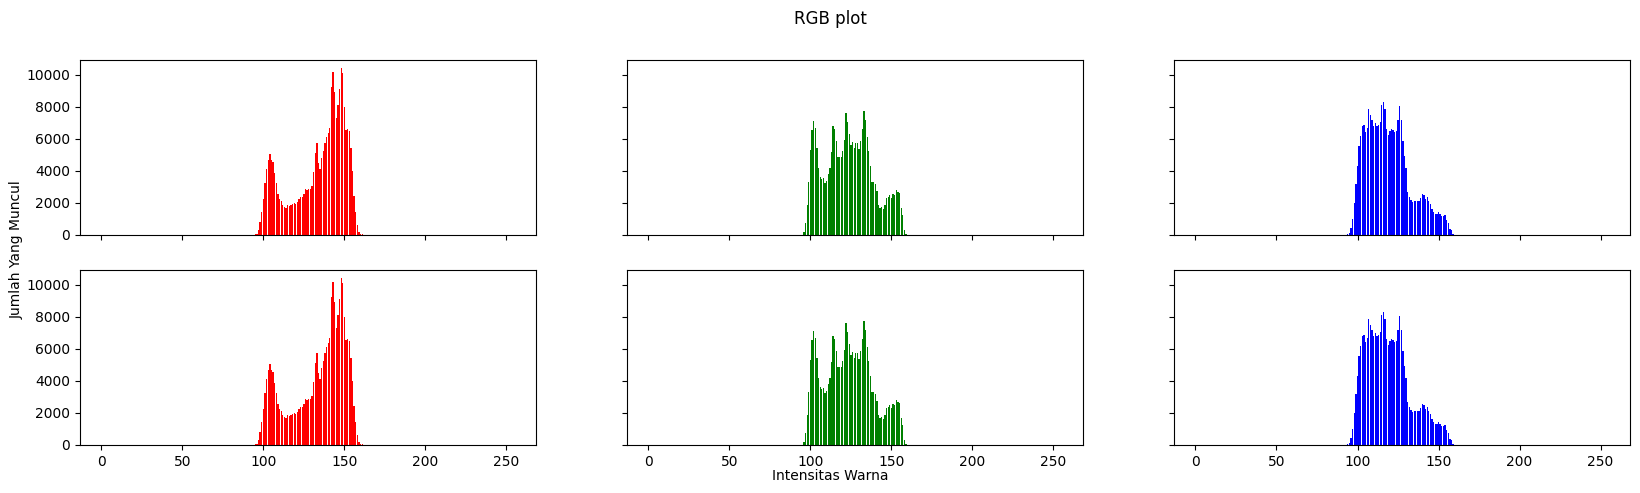

In [36]:
channels = cv.split(img1)
eq_channels = []
for ch, color in zip(channels, ["red", "green", "blue"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img1, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Yang Muncul', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, real_hist[2], color='red')
  axs[0,1].bar(names, real_hist[1], color='green')
  axs[0,2].bar(names, real_hist[0], color='blue')
  axs[1,0].bar(names, real_hist[2], color='red')
  axs[1,1].bar(names, real_hist[1], color='green')
  axs[1,2].bar(names, real_hist[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Yang Muncul', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, real_hist[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

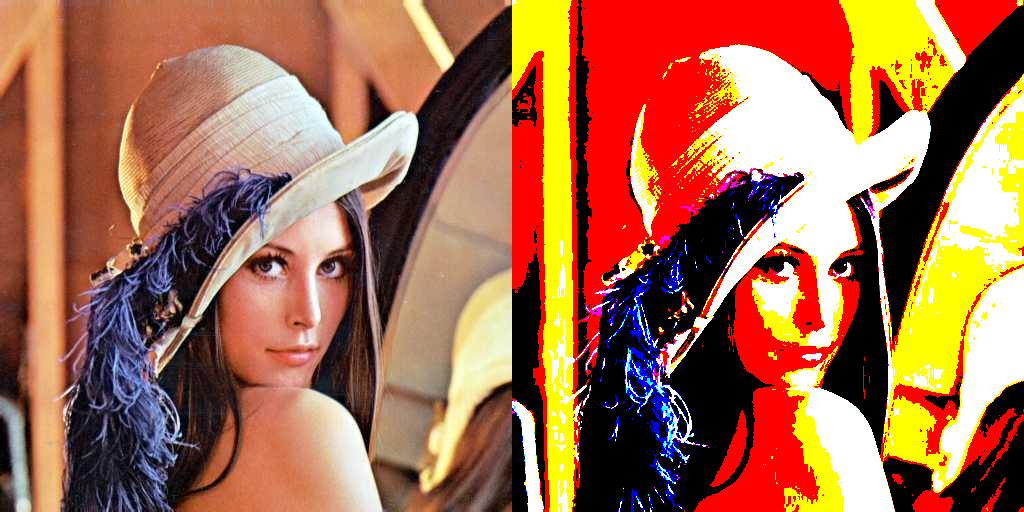

True

In [37]:
def closestColour (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = closestColour(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/lena (1).jpg', img_8)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

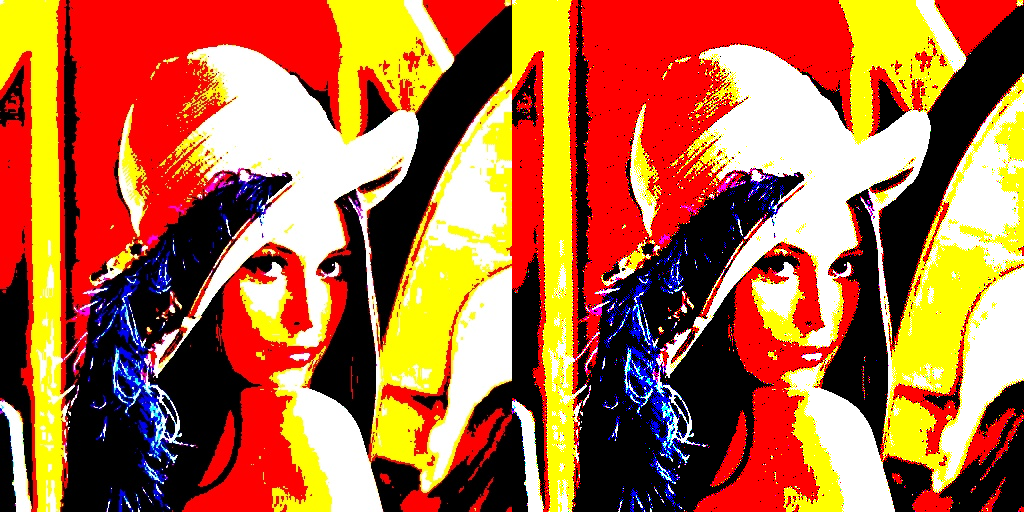

In [39]:
img = cv.imread('/content/drive/MyDrive/lena (1).jpg')
# Convert to float
img_float = np.float64(img)
# Image size
height, width, channels = img.shape
#  Floyd and Steinberg dithering process on each color channel
for y in range(height):
    for x in range(width):
        for c in range(channels):  # Loop for every color channel (R, G, B)
            old_value = img_float[y, x, c]
            new_value = round(old_value / 255) * 255
            img_float[y, x, c] = new_value

            error = old_value - new_value

            if x < width - 1:
                img_float[y, x + 1, c] += error * 7 / 16
            if y < height - 1:
                if x > 0:
                    img_float[y + 1, x - 1, c] += error * 3 / 16
                img_float[y + 1, x, c] += error * 5 / 16
                if x < width - 1:
                    img_float[y + 1, x + 1, c] += error * 1 / 16

# Convert back to uint8 type
output_img = np.uint8(img_float)

# Displays the initial image and dithering results
final_frame = cv.hconcat((img, output_img))
cv2_imshow(final_frame)

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

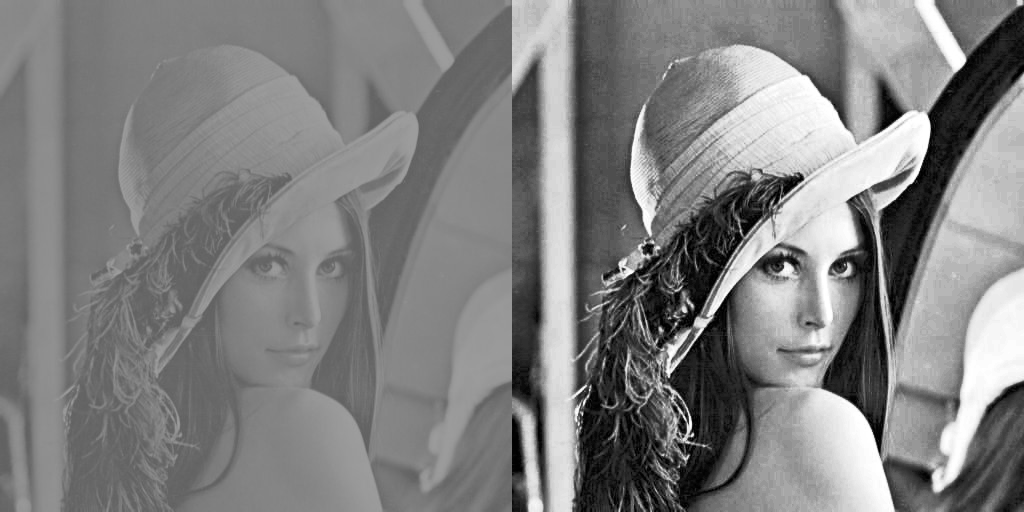

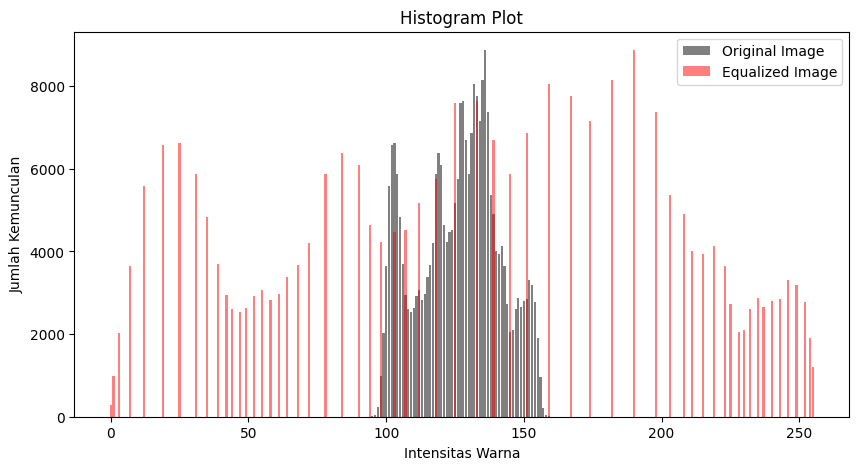

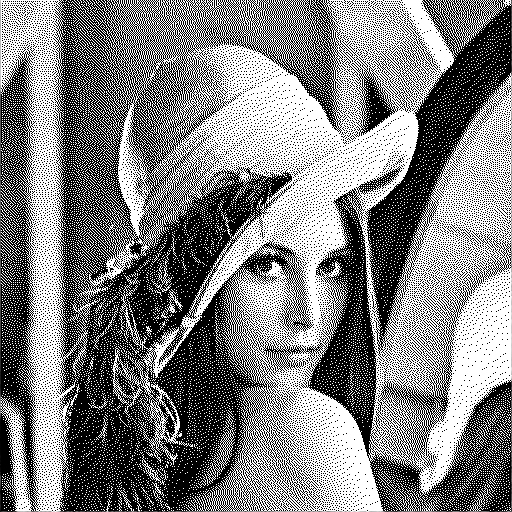

In [40]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Open the image and convert to grayscale
img_lc = cv.imread('/content/drive/MyDrive/lena_lc.jpg')
img_gray = cv.cvtColor(img_lc, cv.COLOR_BGR2GRAY)
img_ori = cv.cvtColor(img_lc, cv.COLOR_BGR2RGB)

# Perform equalization on grayscale images
img_equalized = cv.equalizeHist(img_gray)

# Show image
concatenated_img = cv.hconcat([img_gray, img_equalized])
cv2_imshow(concatenated_img)

# Implement the Floyd-Steinberg dithering process
height, width = img_equalized.shape[0], img_equalized.shape[1]
dithered_image = np.copy(img_equalized)

def threshold(value):
    if value > 255:
        return 255
    elif value < 0:
        return 0
    else:
        return value

def floyd_steinberg_dithering(img):
    height, width = img.shape
    for y in range(height - 1):
        for x in range(1, width - 1):
            old_pixel = img[y, x]
            new_pixel = 255 if old_pixel > 127 else 0
            img[y, x] = new_pixel
            error = old_pixel - new_pixel
            img[y, x + 1] = threshold(img[y, x + 1] + error * 7/16)
            img[y + 1, x - 1] = threshold(img[y + 1, x - 1] + error * 3/16)
            img[y + 1, x] = threshold(img[y + 1, x] + error * 5/16)
            img[y + 1, x + 1] = threshold(img[y + 1, x + 1] + error * 1/16)
    return img

dithered_img = floyd_steinberg_dithering(img_equalized.copy())

# Calculates histograms for the original image and the equalization results
hist_np, bins_np = np.histogram(img_gray.flatten(), bins=256, range=[0, 256])
hist_eq, bins_eq = np.histogram(img_equalized.flatten(), bins=256, range=[0, 256])

names = np.arange(256)
plt.figure(figsize=(10,5))
plt.title('Histogram Plot')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.bar(names, hist_np, color='gray', label='Original Image')
plt.bar(names, hist_eq, color='red', alpha=0.5, label='Equalized Image')
plt.legend()
plt.show()

cv2_imshow(dithered_img)